# Практическая работа №3: Кластерный анализ
Выполнила студентка гр. 0373 Морозова Екатерина. Вариант №14

## Цель работы
Освоение основных понятий и некоторых методов кластерного анализа, в частности, метода k-means и метода поиска сгущений.

## Основные теоретические положения

#### Нормализация множества точек:  
$ Z_i = \frac{x_i - \bar{x}}{\sigma } $  
  
#### «Грубая» верхняя оценка количества кластеров:  
$ k = \left \lfloor \sqrt{\frac{n}{2}}\right \rfloor $  
  
#### Алгоритм k-means:  
Алгоритм стремится минимизировать суммарное квадратичное отклонение точек кластеров от центроидов этих кластеров (векторов, элементы которого представляют собой средние значения соответствующих признаков, вычисленные по всем точкам кластера).  
  
#### Алгоритм k-medoids:  
Алгоритм аналогичен алгоритму k-means, но вмето центроида для каждого кластера высчитывается медоид - точка, принадлежащая кластеру, расстояние от которой до всех других точек кластера минимально.  
  
#### Алгоритм FOREL:
На каждом шаге мы случайным образом выбираем объект из выборки, раздуваем вокруг него сферу радиуса R, внутри этой сферы выбираем центр тяжести и делаем его центром новой сферы. Т.о. мы на каждом шаге двигаем сферу в сторону локального сгущения объектов выбоки, т.е. стараемся захватить как можно больше объектов выборки сферой фиксированного радиуса. После того как центр сферы стабилизируется, все объекты внутри сферы с этим центром мы помечаем как кластеризованные и выкидываем их из выборки. Этот процесс мы повторяем до тех пор, пока вся выборка не будет кластеризована.  
   
$ R_{min} < R < R_{max} $

#### Метод локтя для поиска оптимального количества кластеров:
Алгоритм вычисляет сумму квадратов расстояний между точками и вычисляет среднее значение. Далее строится график зависимости этой суммы (разброса) от количества кластеров. За оптимальное количество кластеров выбирается точка, после которой разброс уменьшается с наименьшей степенью.  

#### Поиск $ R_{min} $ и $ R_{max} $:
Строится матрица $ D $:  
$ \left\{ d_{ij} \right\}, i > j $, где $ d_{ij} $ - метрика между точками $i$ и $j$.  
  
$ R_{min} = min\left\{ d_{ij} > 0 \right\} $  
$ R_{max} = max\left\{ d_{ij}\right\} $  


## Постановка задачи
Дано конечное множество из объектов, представленных двумя признаками (в качестве этого множества принимаем исходную двумерную выборку, сформированную ранее в практической работе №2).  
Выполнить разбиение исходного множества объектов на конечное число подмножеств (кластеров) с использованием метода k-means и метода поиска сгущений.  
Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [1]:
import numpy as np
import pandas as pd

import random

import matplotlib.pyplot as plt

from math import sqrt
from math import floor

In [2]:
full_sample = pd.read_csv('sample_task3.csv', names = ['average_price', 'total_volume'])

X = full_sample['average_price'].values.tolist()
Y = full_sample['total_volume'].values.tolist()

n = 95

#### 1.

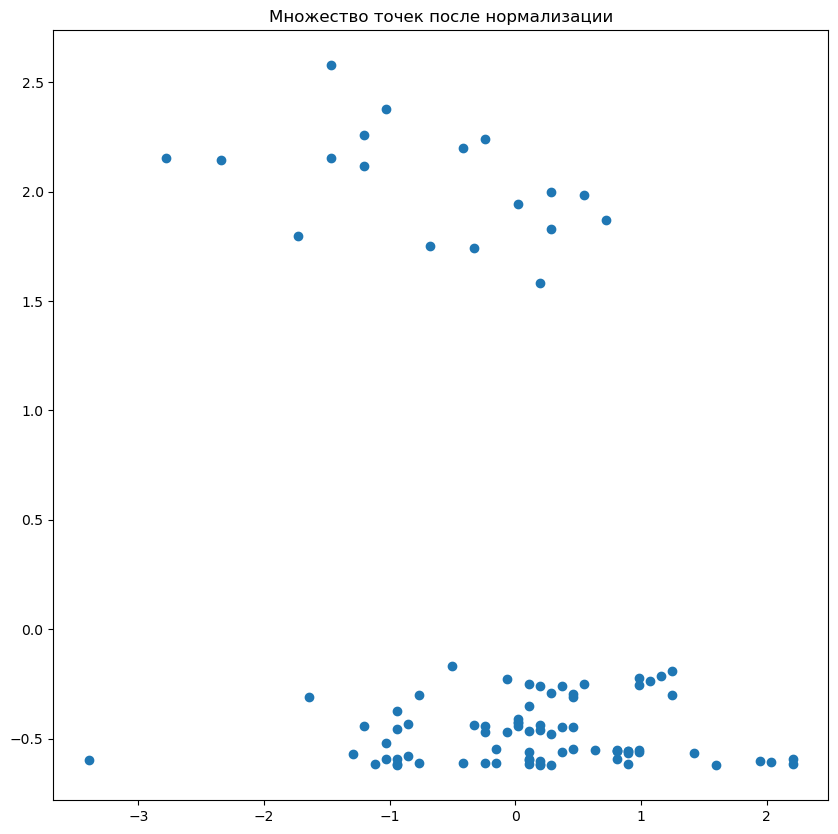

In [3]:
# Нормализовать множество точек из предыдущей работы, отобразить полученное множество.

mean_X = np.mean(X)
mean_Y = np.mean(Y)

d_X = sqrt(np.var(X))
d_Y = sqrt(np.var(Y))

for i in range(len(X)):
    X[i] = (X[i] - mean_X) / d_X
    
for i in range(len(Y)):
    Y[i] = (Y[i] - mean_Y) / d_Y
    
points = list(zip(X, Y))

plt.figure(figsize = (10,10))
plt.title("Множество точек после нормализации")    
plt.plot(X, Y, 'o')
plt.show()

#### 2.


In [4]:
# Определить «грубую» верхнюю оценку количества кластеров 𝑘.

k = floor(sqrt(n / 2))

print("k = {}".format(k))

k = 6


Грубая верхняя оценка количества кластеров $ \tilde{k} $ равна 6.

#### 3.


In [5]:
# Реализовать алгоритм k-means. Отобразить полученные кластеры,
# каждый кластер выделить разным цветом или маркером, отметить центроиды.

def distance(p1, p2):
    return [np.sqrt(sum([(p1_c - p2_c)**2 for p1_c, p2_c in zip(p1, p2)]))]

def k_means(points, k, init_centroids = None):
    
    if init_centroids == None:
        centroids = random.sample(points, k)
    else:
        centroids = init_centroids
    
    while True:
        clusters = [[] for _ in range(k)]
        
        for point in points:
            distances = [distance(point, centroid) for centroid in centroids]
            clusters[distances.index(min(distances))].append(point)
        
        new_centroids = []
        for cluster in clusters:
            new_centroids.append((np.mean(np.array(cluster)[:,0]),np.mean(np.array(cluster)[:,1])))
            
        if all(c == new_c for c, new_c in zip(centroids, new_centroids)):
            break
            
        centroids = new_centroids
        
    return centroids, clusters

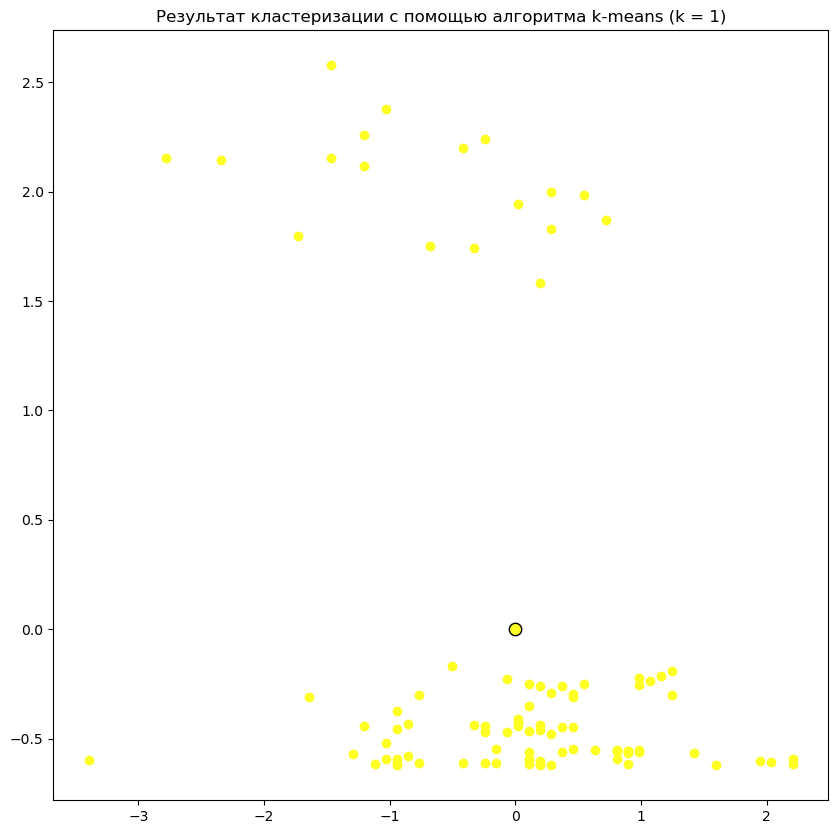

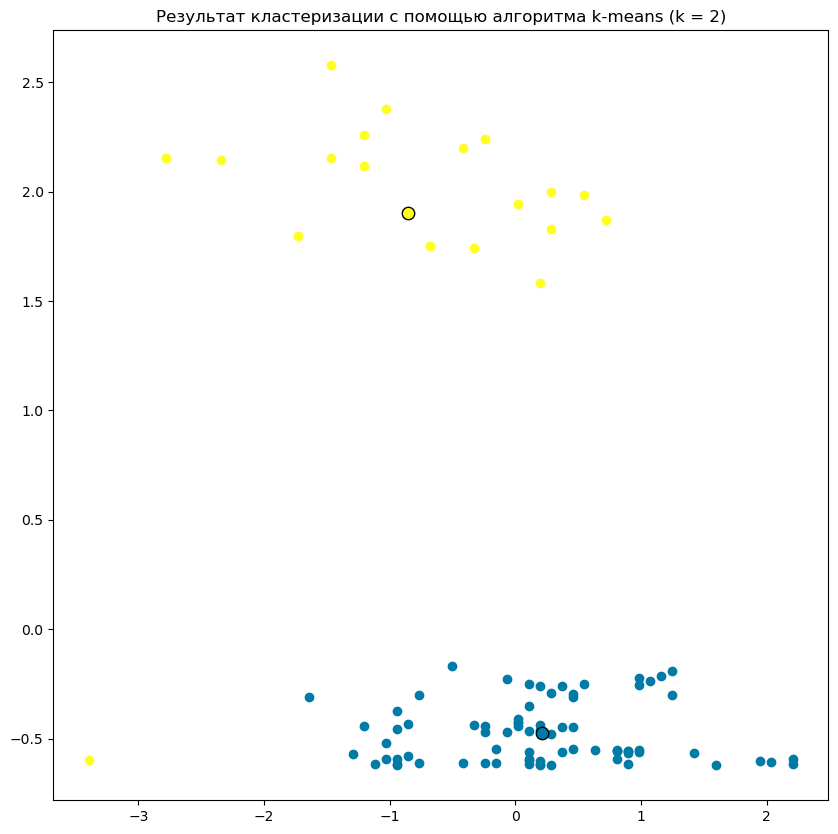

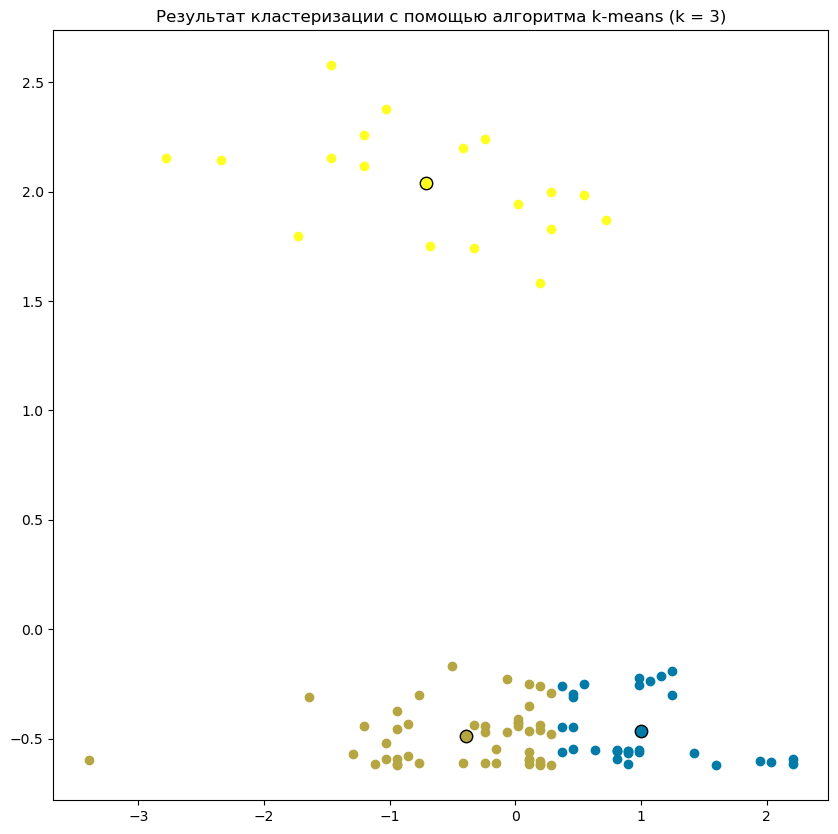

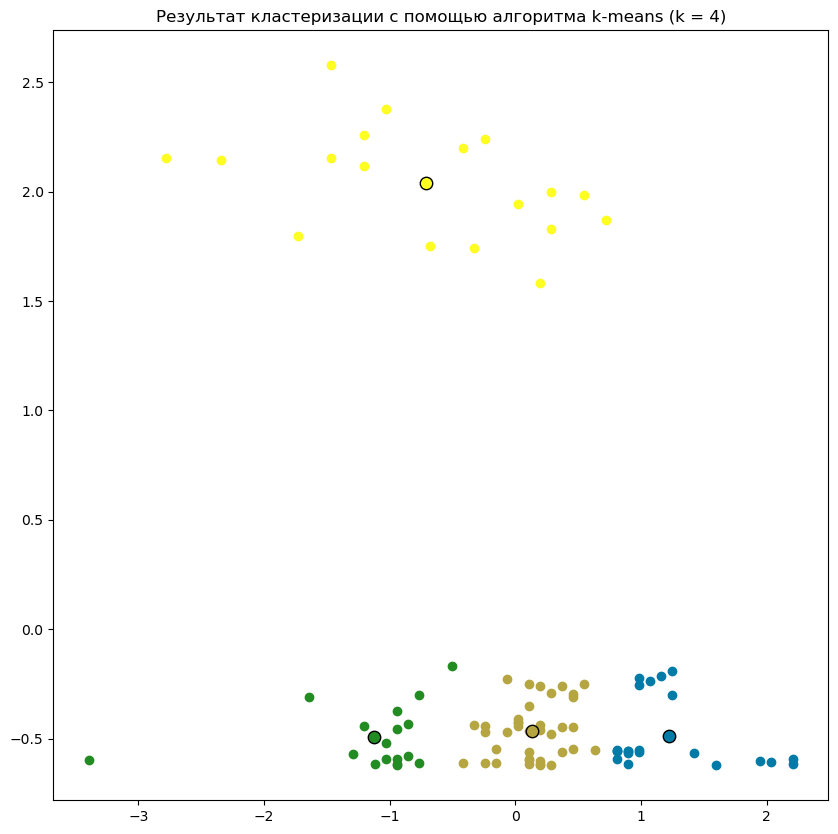

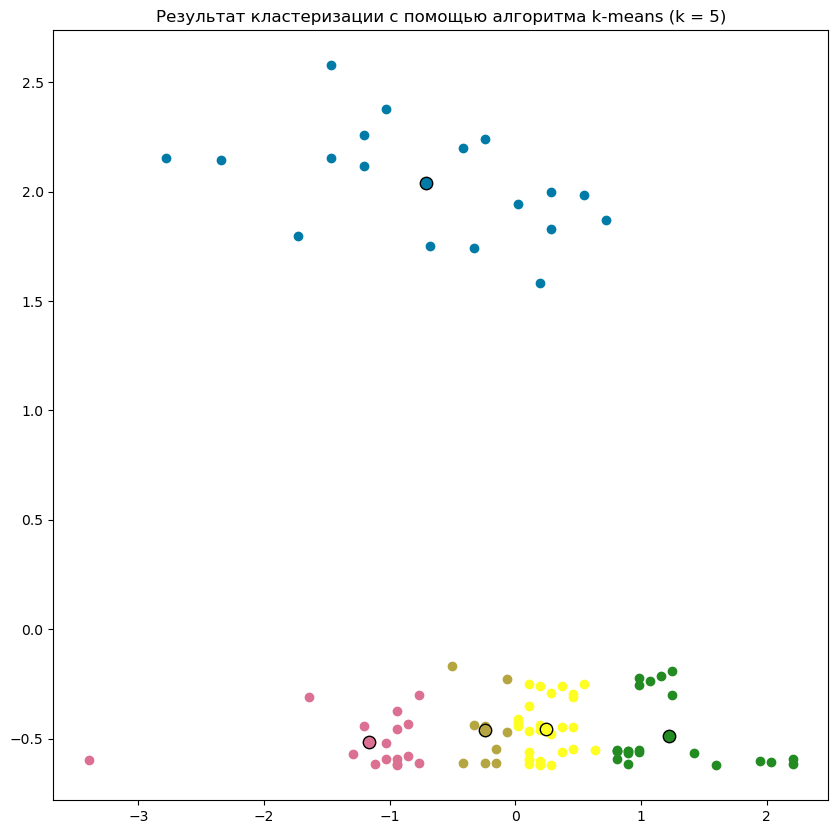

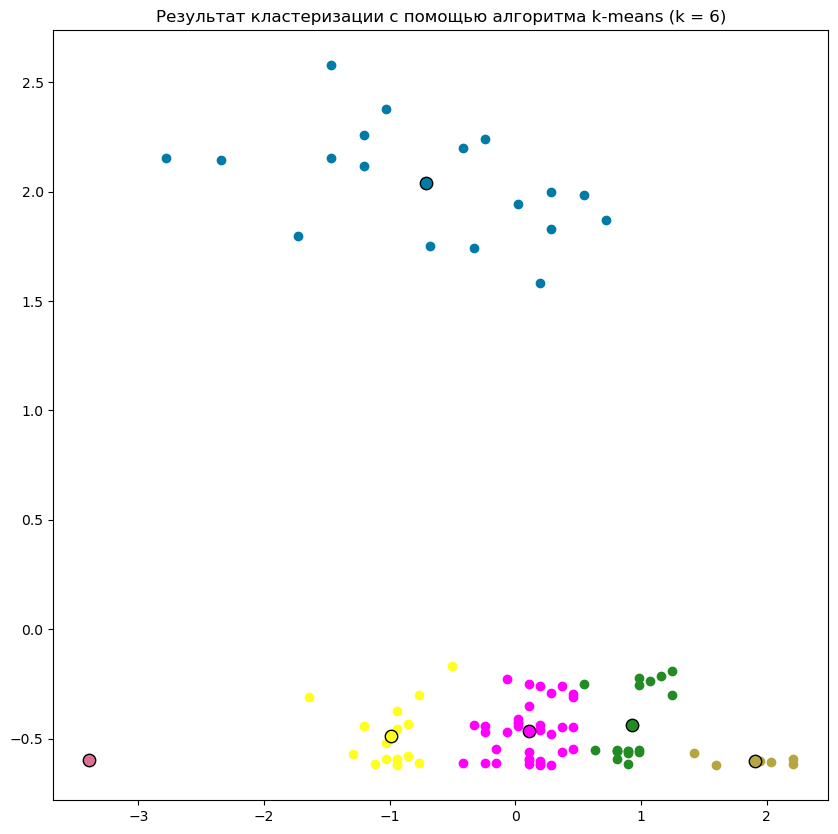

In [6]:
def points_to_list(cluster):
    x = []
    y = []
    
    for i in range(len(cluster)):
        x.append(cluster[i][0])
        y.append(cluster[i][1])
    
    return x, y

init_c = [[points[21]], 
        [points[35], points[21]],
        [points[35], points[68], points[56]],
        [points[35], points[68], points[56], points[13]],
        [points[89], points[42], points[93], points[13], points[2]],
        [points[15], points[39], points[56], points[10], points[2], points[90]]]

colors = ["#FEFE22", "#007BA7", "#B5A642", "#228B22", "#DB7093", "#FF00FF", "#FF8800", "#4C2F27", "#6B8E23",
         "#252850", "#AEA04B", "#E3A9BE", "#AB4E52", "#92000A", "#A6CAF0", "#C0C0C0", "#735184", "#6C7059"]

for i in range(k):
    centroids, clusters = k_means(points, i + 1, init_c[i])
    
    f, ax = plt.subplots(figsize = (10, 10))
    
    for j in range(len(centroids)):
        X, Y = points_to_list(clusters[j])
        ax.scatter(X, Y, c = colors[j])
        ax.scatter(centroids[j][0], centroids[j][1], marker = 'o', s = 80, c = colors[j], edgecolors = 'k')
        
    ax.set_title("Результат кластеризации с помощью алгоритма k-means (k = {})".format(i + 1))
    plt.show()

#### 4.


In [7]:
# Реализовать алгоритм k-medoids. Отобразить полученные кластеры, каждый кластер
# выделить разным цветом или маркером, отметить центроиды.

def distance_points(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def find_medoid(cluster):
    d_min = float("inf")
    medoid = None
    
    for p1 in cluster:
        d = 0
        
        for p2 in cluster:
            d += distance_points(p1, p2)
            
        if d < d_min:
            d_min = d
            medoid = p1
            
    return medoid            

def k_medoids(points, k, init_medoids = None):
    
    if init_medoids == None:
        medoids = random.sample(points, k)
    else:
        medoids = init_medoids
    
    while True:
        clusters = [[] for _ in range(k)]
        
        for point in points:
            distances = [distance(point, medoid) for medoid in medoids]
            clusters[distances.index(min(distances))].append(point)
        
        new_medoids = []            
        new_medoids = [find_medoid(cluster) for cluster in clusters]

        if medoids == new_medoids:
            break
            
        medoids = new_medoids
        
    return medoids, clusters

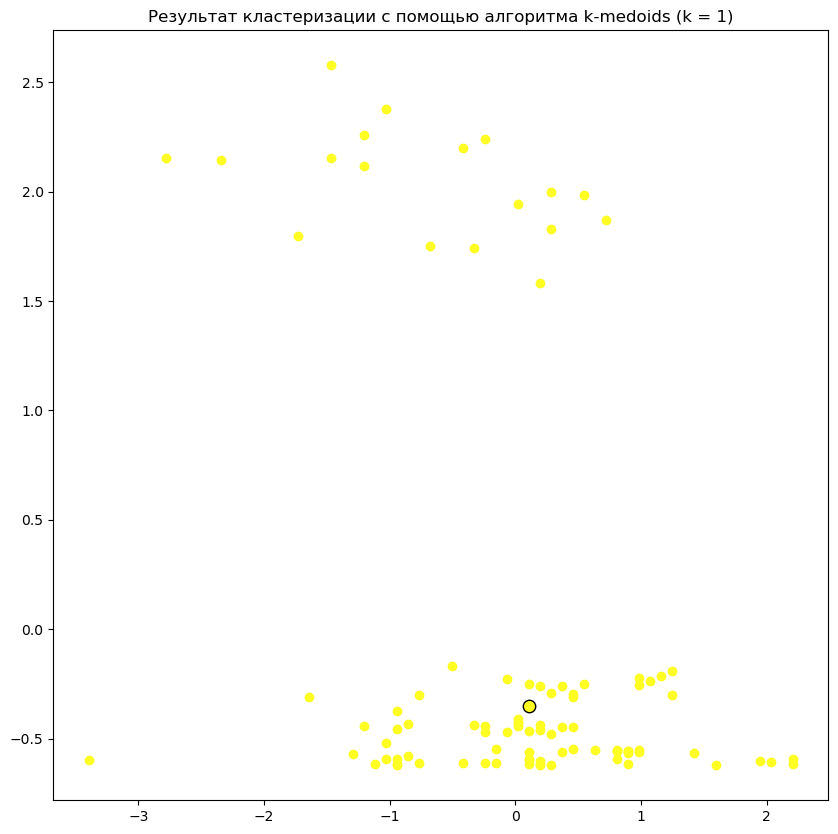

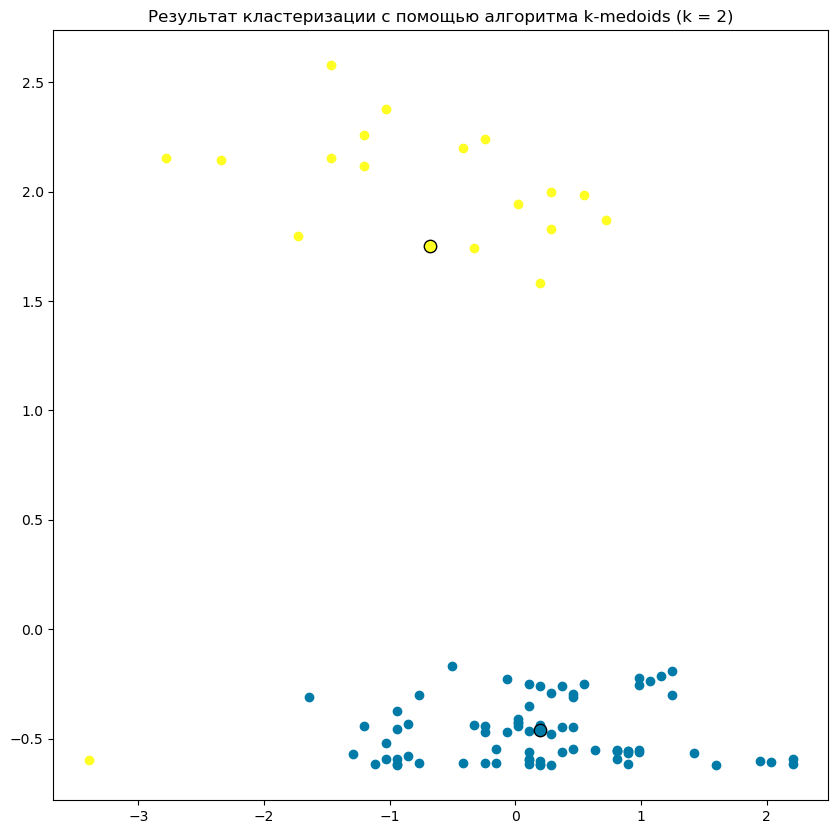

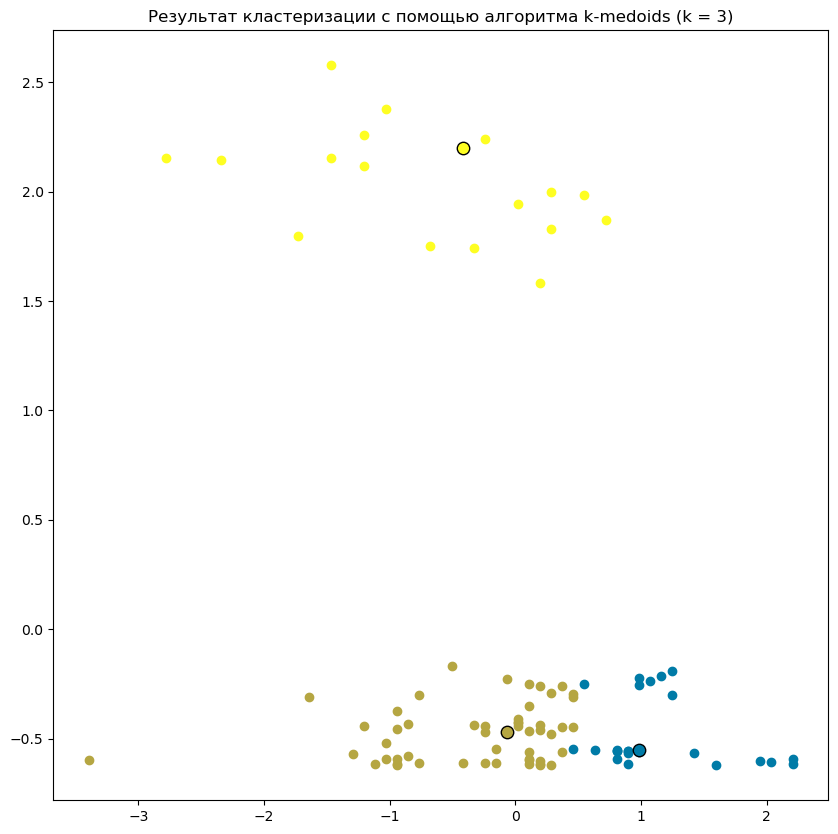

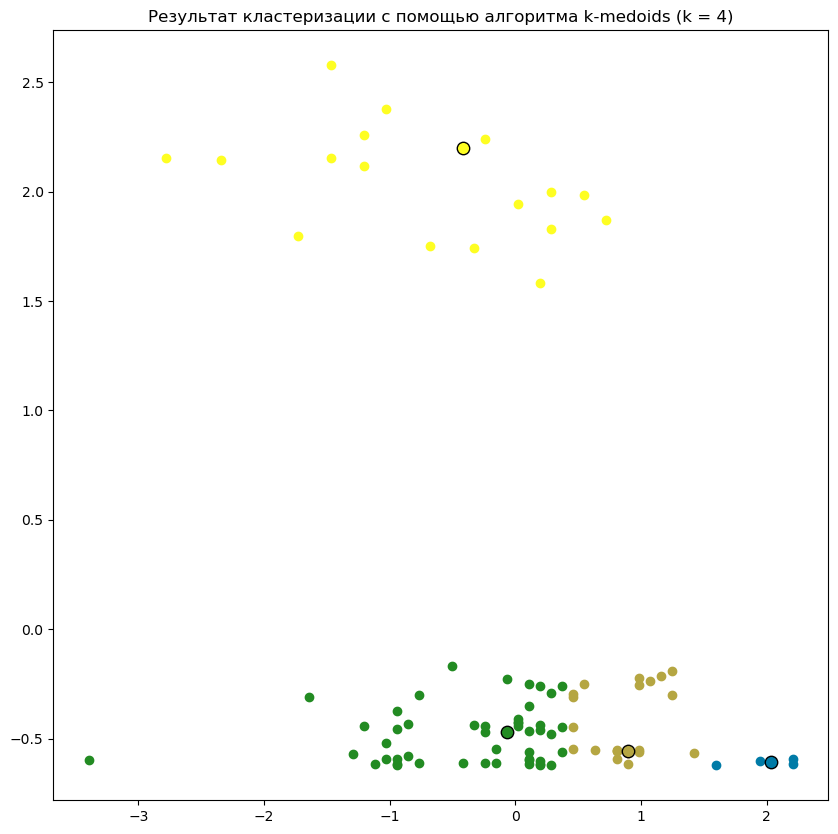

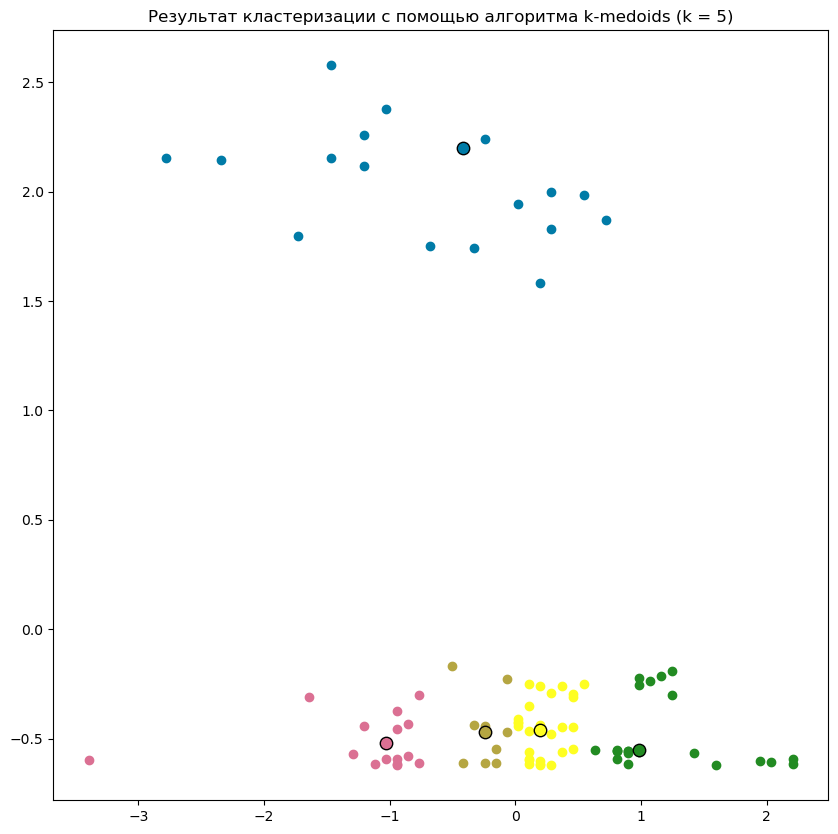

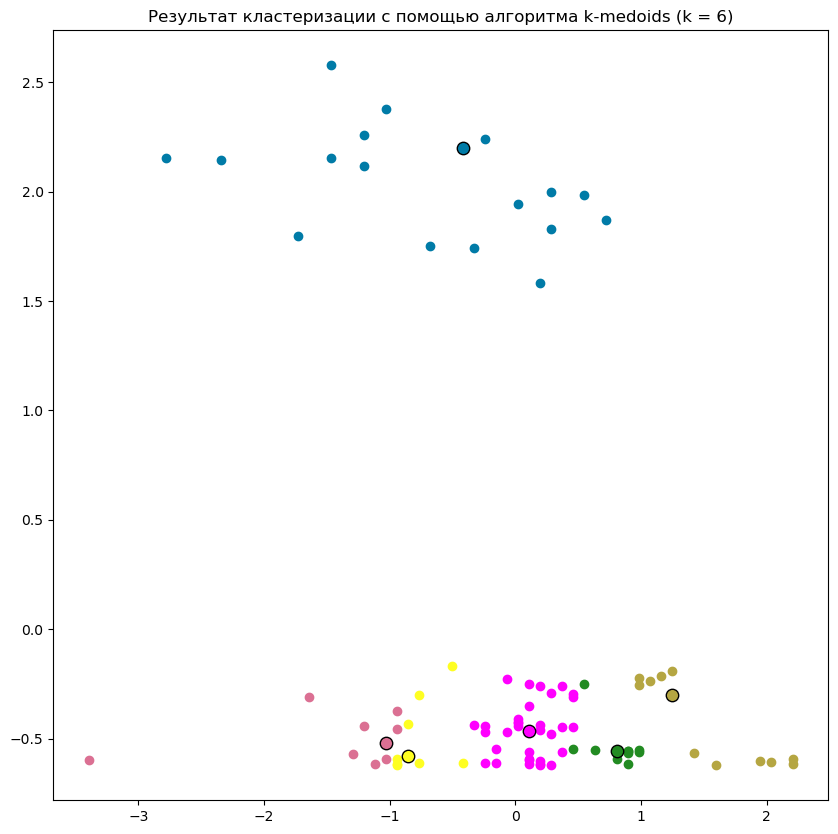

In [8]:
for i in range(k):
    medoids, clusters = k_medoids(points, i + 1, init_c[i])
    
    f, ax = plt.subplots(figsize = (10, 10))
    
    for j in range(len(medoids)):
        X, Y = points_to_list(clusters[j])
        ax.scatter(X, Y, c = colors[j])
        ax.scatter(medoids[j][0], medoids[j][1], marker = 'o', s = 80, c = colors[j], edgecolors = 'k')
        
    ax.set_title("Результат кластеризации с помощью алгоритма k-medoids (k = {})".format(i + 1))
    plt.show()

#### 5.


In [9]:
# Для каждого метода заполнить следующую таблицу, где значения ˜𝑘 изменяются от 1 до 𝑘.

print("k-means:\n")
for i in range(k):
    centroids, clusters = k_means(points, i + 1, init_c[i])
    
    print("\nДля k = {}:\n".format(i + 1))
    
    for j in range(len(centroids)):
        print("Центроид кластера: {}; объем кластера: {}".format(centroids[j], len(clusters[j])))

print("\nk-medoids:\n")
for i in range(k):
    medoids, clusters = k_medoids(points, i + 1, init_c[i])
    
    print("\nДля k = {}:\n".format(i + 1))
    
    for j in range(len(medoids)):
        print("Центроид кластера: {}; объем кластера: {}".format(medoids[j], len(clusters[j])))

k-means:


Для k = 1:

Центроид кластера: (6.474353217287755e-16, -9.758276058547428e-17); объем кластера: 95

Для k = 2:

Центроид кластера: (-0.8545989586072665, 1.9017546431565955); объем кластера: 19
Центроид кластера: (0.21364973965181747, -0.47543866078914904); объем кластера: 76

Для k = 3:

Центроид кластера: (-0.7134974285243814, 2.040649240102374); объем кластера: 18
Центроид кластера: (1.001537520547571, -0.4634057926506778); объем кластера: 31
Центроид кластера: (-0.3957545526855605, -0.4862197119493857); объем кластера: 46

Для k = 4:

Центроид кластера: (-0.7134974285243814, 2.040649240102374); объем кластера: 18
Центроид кластера: (1.2234417571588592, -0.4862393879693993); объем кластера: 22
Центроид кластера: (0.13413608249984696, -0.4639749121009064); объем кластера: 38
Центроид кластера: (-1.1276432987676568, -0.49431606627538366); объем кластера: 17

Для k = 5:

Центроид кластера: (0.24166429651945334, -0.45520871827624926); объем кластера: 29
Центроид кластера: (-0.

**K-means:**  
  
| k 	| Центроиды кластера $ x_{C_i} $                                                                                                                                                                                                                                                            	| Объем кластера # $ C_i $                      	|
|---	|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|-----------------------------------------------	|
| **1** 	| (6.474353217287755e-16, -9.758276058547428e-17)                                                                                                                                                                                                                                           	| 95                                            	|
| **2** 	| (-0.8545989586072665, 1.9017546431565955)<br /> (0.21364973965181747, -0.47543866078914904)                                                                                                                                                                                               	| 19<br /> 76                                   	|
| **3** 	| (-0.7134974285243814, 2.040649240102374)<br /> (1.001537520547571, -0.4634057926506778)<br /> (-0.3957545526855605, -0.4862197119493857)                                                                                                                                                  	| 18<br /> 31<br /> 46                          	|
| **4** 	| (-0.7134974285243814, 2.040649240102374)<br /> (1.2234417571588592, -0.4862393879693993)<br /> (0.13413608249984696, -0.4639749121009064)<br /> (-1.1276432987676568, -0.49431606627538366)                                                                                               	| 18<br /> 22<br /> 38<br /> 17                 	|
| **5** 	| (0.24166429651945334, -0.45520871827624926)<br /> (-0.7134974285243814, 2.040649240102374)<br /> (-0.24153713824714446, -0.46003956555958797)<br /> (1.2234417571588592, -0.4862393879693993)<br /> (-1.1666036350405427, -0.5145607063068035)                                            	| 29<br /> 18<br /> 10<br /> 22<br /> 16        	|
| **6** 	| (-0.9859693486844354, -0.4878140640508814)<br /> (-0.7134974285243814, 2.040649240102374)<br /> (1.9041792330132807, -0.600527664334039)<br /> (0.9261996624388004, -0.438503017146326)<br /> (-3.3944265000991987, -0.5983481018674202)<br /> (0.10878390195863899, -0.4675581361256424) 	| 16<br /> 18<br /> 6<br /> 18<br /> 1<br /> 36 	|

**K-medoids:**
  
| k 	| Центроиды кластера $ x_{C_i} $                                                                                                                                                                                                                                                                 	| Объем кластера # $ C_i $                      	|
|---	|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|-----------------------------------------------	|
| **1** 	| (0.10878390195863953, -0.35256276592568747)                                                                                                                                                                                                                                                    	| 95                                            	|
| **2** 	| (-0.6794384385043746, 1.7512574274298884)<br /> (0.19636416201008552, -0.46083680353982603)                                                                                                                                                                                                    	| 19<br /> 76                                   	|
| **3** 	| (-0.4166976583500365, 2.2006323667357846)<br /> (0.9845865024730976, -0.5520659725537106)<br /> (-0.06637661814425248, -0.47080815898698014)                                                                                                                                                   	| 18<br /> 25<br /> 52                          	|
| **4** 	| (-0.4166976583500365, 2.2006323667357846)<br /> (2.03554962309045, -0.6057390998152248)<br /> (0.8970062424216516, -0.5562619047908843)<br /> (-0.06637661814425248, -0.47080815898698014)                                                                                                     	| 18<br /> 5<br /> 23<br /> 49                  	|
| **5** 	| (0.19636416201008552, -0.46083680353982603)<br /> (-0.4166976583500365, 2.2006323667357846)<br /> (-0.2415371382471445, -0.4712158386560481)<br /> (0.9845865024730976, -0.5520659725537106)<br /> (-1.0297594787101585, -0.5214341659128603)                                                  	| 28<br /> 18<br /> 10<br /> 23<br /> 16        	|
| **6** 	| (-0.8545989586072665, -0.5797765498134835)<br /> (-0.4166976583500365, 2.2006323667357846)<br /> (1.2473272826274358, -0.30011009472123545)<br /> (0.8094259823702057, -0.5553884024212304)<br /> (-1.0297594787101585, -0.5214341659128603)<br /> (0.10878390195863953, -0.46729764382697203) 	| 9<br /> 18<br /> 12<br /> 13<br /> 9<br /> 34 	|

#### 6.


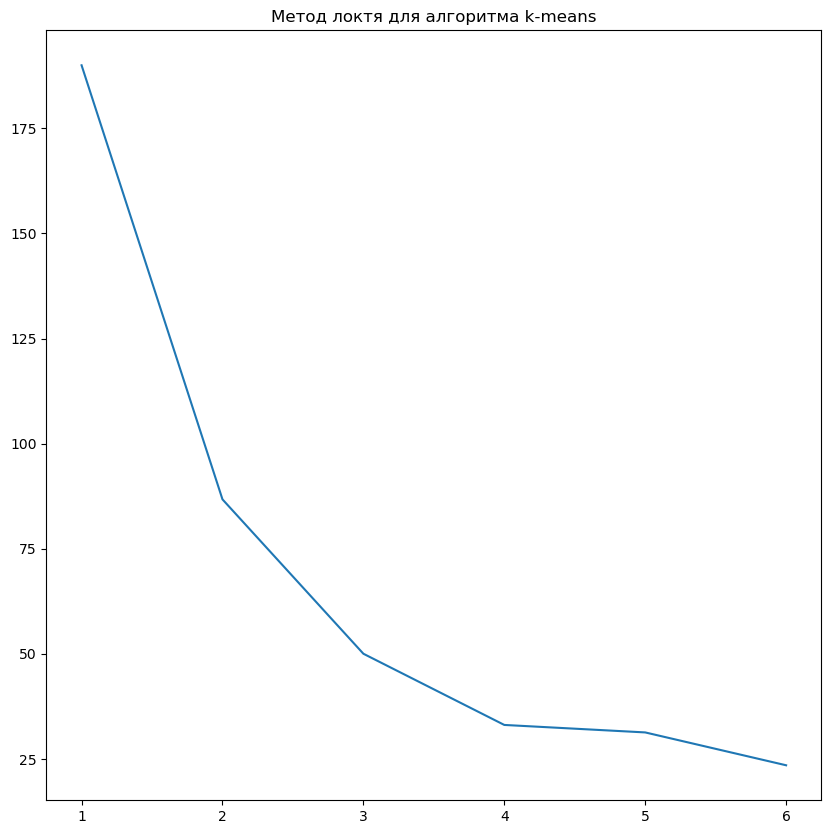

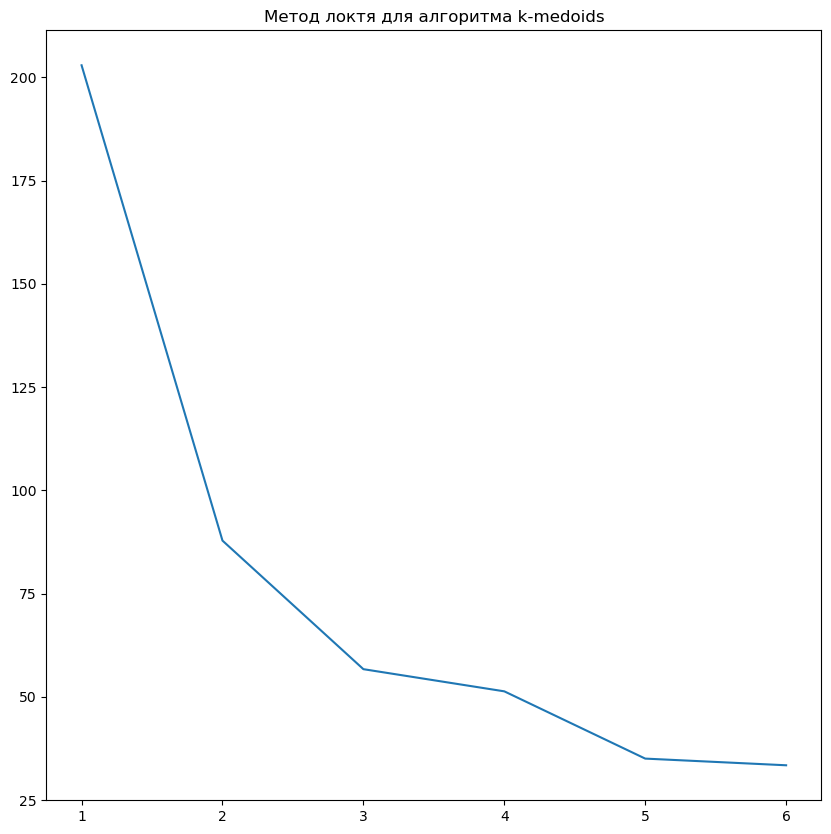

In [10]:
# С помощью метода локтя выявить для каждого метода оптимальное количество кластеров.

def elbow_rule(points, k_min, k_max):
    
    distances_kmeans = []
    distances_kmedoids = []
    
    for k in range(k_min, k_max + 1):
        
        centroids, clusters_kmeans = k_means(points, k, init_c[k - 1])
        medoids, clusters_kmedoids = k_medoids(points, k, init_c[k - 1])
        
        distances_kmeans.append(sum([sum([distance_points(centroids[i], point)**2 for point in clusters_kmeans[i]]) for i in range(len(clusters_kmeans))]))
        distances_kmedoids.append(sum([sum([distance_points(medoids[i], point)**2 for point in clusters_kmedoids[i]]) for i in range(len(clusters_kmedoids))]))
        
    return distances_kmeans, distances_kmedoids

k_min = 1
k_max = 6

distances_kmeans, distances_kmedoids = elbow_rule(points, k_min, k_max)

plt.figure(figsize = (10,10))
plt.plot([1, 2, 3, 4, 5, 6], distances_kmeans)
plt.title("Метод локтя для алгоритма k-means")
plt.show()

plt.figure(figsize = (10,10))
plt.plot([1, 2, 3, 4, 5, 6], distances_kmedoids)
plt.title("Метод локтя для алгоритма k-medoids")
plt.show()

Для алгоритма kmeans и заданного набора оптимальное количество кластеров = 3.
Аналогично для алгоритма k-medoids: оптимальное количество кластеров = 3.
  
Оптимальные значения k для обоих алгоритмов совпадают (для одного и того же множества точек).  

#### 7.

In [11]:
# Реализовать алгоритм поиска сгущений при различных радиусах 𝑅, отобразить полученные кластеры,
# выделить каждый кластер разным цветом или маркером, отметить центроиды. 
# Результаты представить в виде таблицы.

D = np.zeros((n, n))

for i in range(len(D)):
    for j in range(len(D)):
        D[i][j] = distance_points(points[i], points[j])
        
R_min = np.min(D[D > 0])
R_max = np.amax(D)

print(R_min)
print(R_max)

0.0015093878644603098
5.710189992762397


Выбираем $ R $:  
  
$ R_{min} < R < R_{max} $  
  
$ 0.0015093878644603098 < R < 5.710189992762397 $

In [12]:
def find_center(points):
    total_x = 0
    total_y = 0
    
    for point in points:
        total_x += point[0]
        total_y += point[1]
        
    mean_x = total_x / len(points)
    mean_y = total_y / len(points)
    
    return (mean_x, mean_y)

def forel(points, R):
    clusters = []
    centers = []
    
    for point in points:
        belong = False
        
        for cluster in clusters:
            distance = distance_points(point, find_center(cluster))
            
            if distance <= R:
                cluster.append(point)
                belong = True
                break
            
        if not belong:
            clusters.append([point])
            centers.append(point)
            
    return centers, clusters

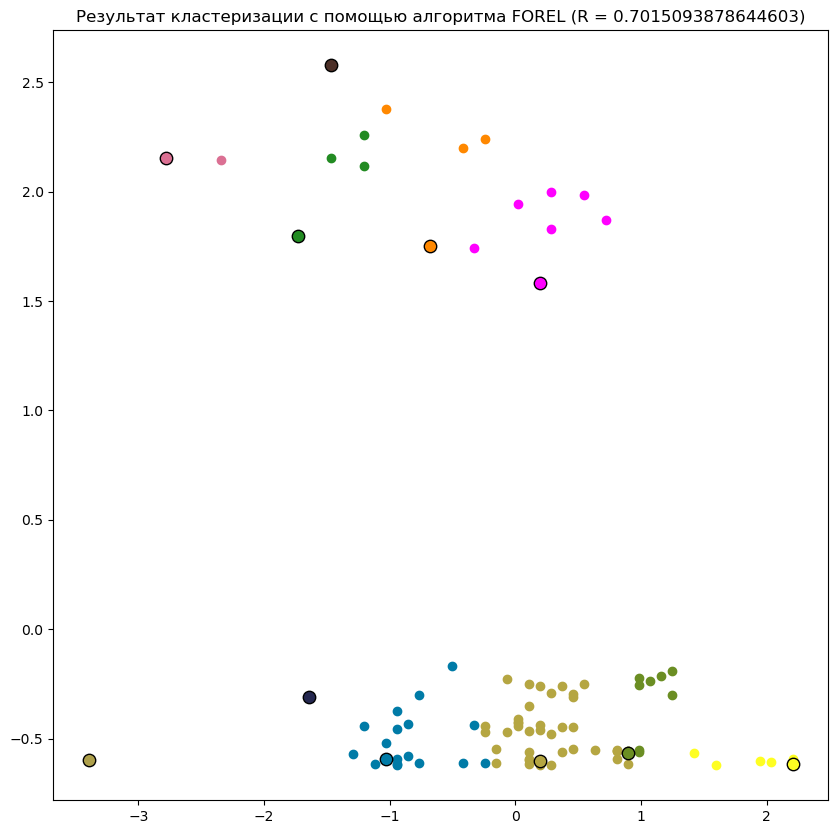

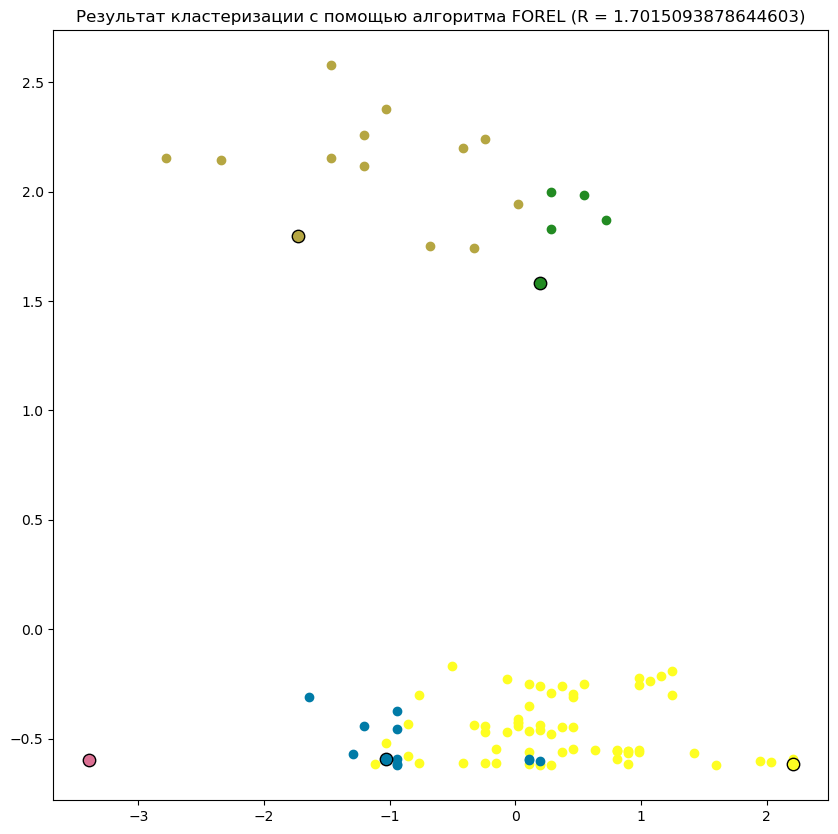

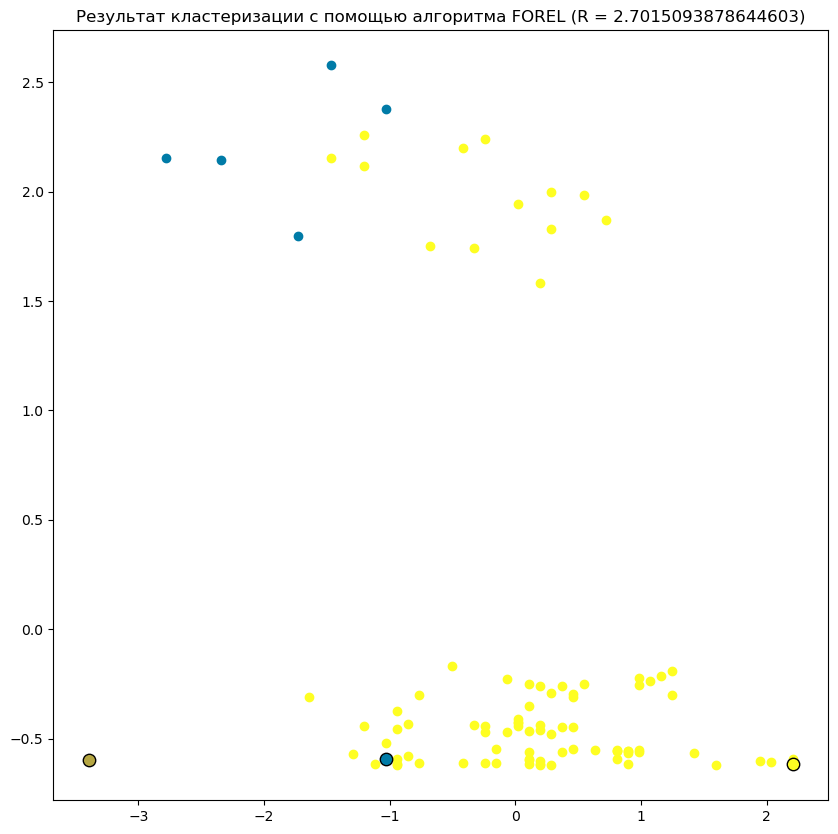

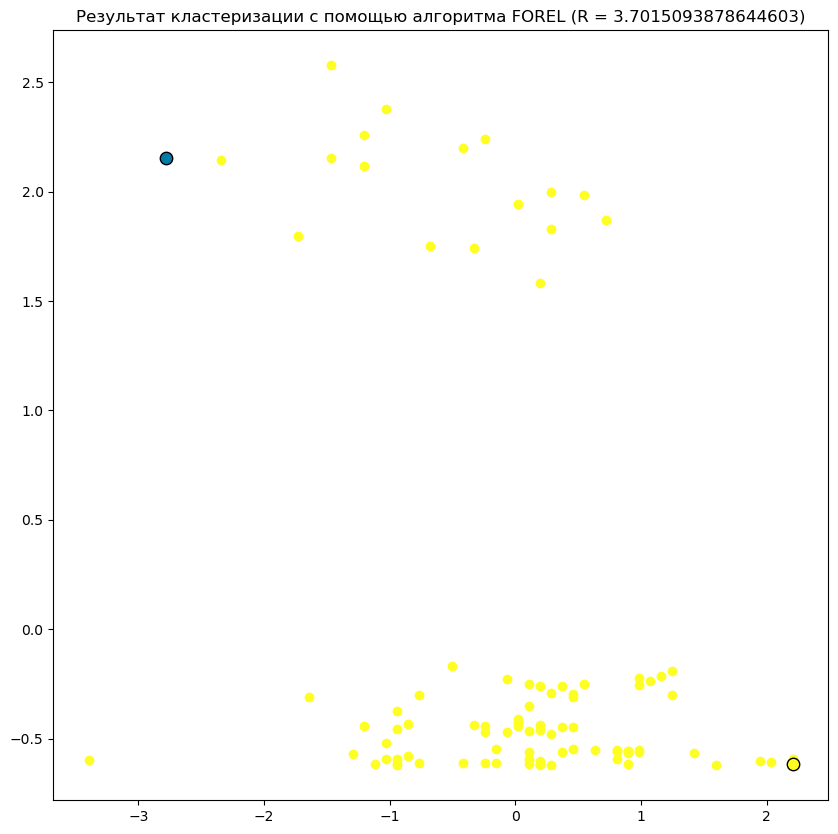

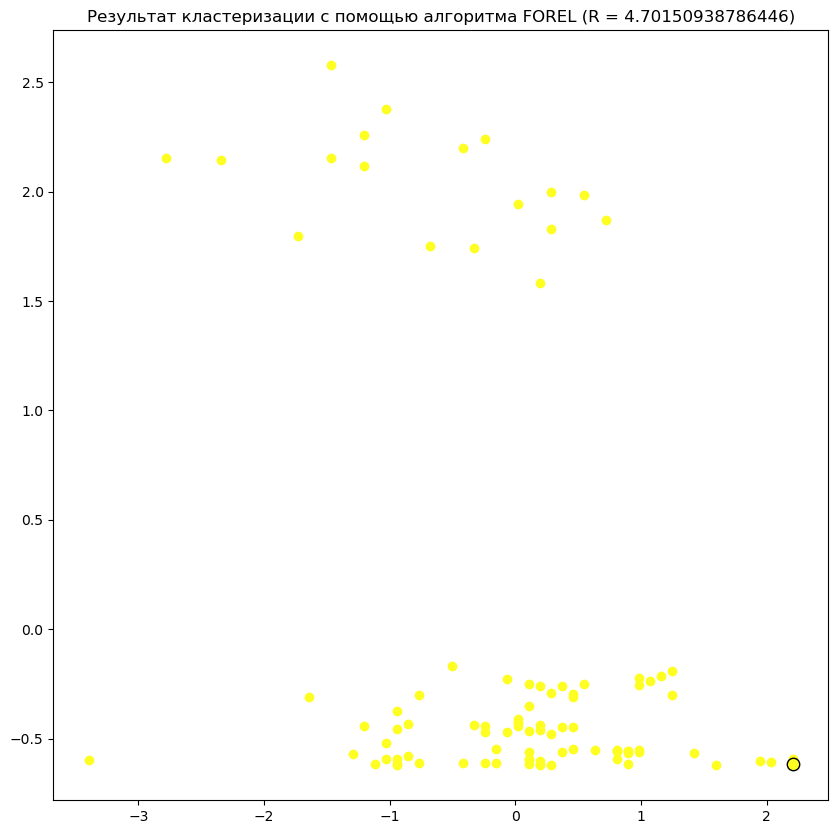

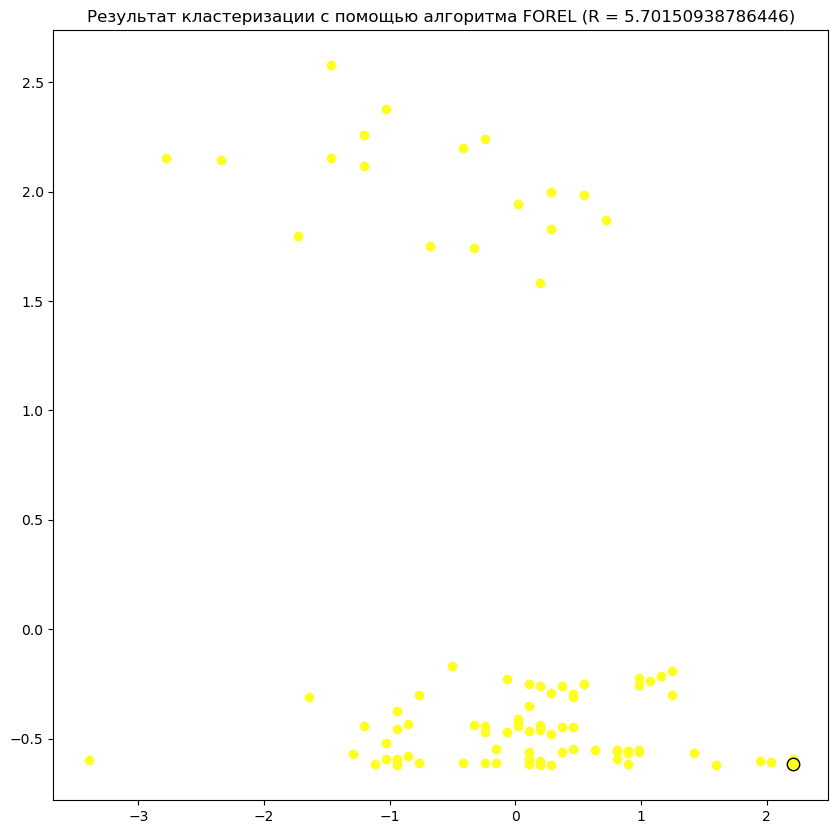

In [13]:
R = []
r = R_min + 0.7

while r < R_max:
    R.append(r)
    r += 1
    
    
for i in range(len(R)):
    centers, clusters = forel(points, R[i])
    
    f, ax = plt.subplots(figsize = (10, 10))
    
    for j in range(len(centers)):
        X, Y = points_to_list(clusters[j])
        ax.scatter(X, Y, c = colors[j])
        ax.scatter(centers[j][0], centers[j][1], marker = 'o', s = 80, c = colors[j], edgecolors = 'k')
        
    ax.set_title("Результат кластеризации с помощью алгоритма FOREL (R = {})".format(R[i]))
    plt.show()

In [14]:
print("FOREL:\n")
for i in range(len(R)):
    centres, clusters = forel(points, R[i])
    
    print("\nДля R = {}:\n".format(R[i]))
    print("\nКоличество кластеров: {}\n".format(len(clusters)))
    
    for j in range(len(centres)):
        print("Центр кластера: {}; объем кластера: {}".format(centres[j], len(clusters[j])))

FOREL:


Для R = 0.7015093878644603:


Количество кластеров: 11

Центр кластера: (2.210710143193342, -0.6179350828591108); объем кластера: 6
Центр кластера: (-1.0297594787101585, -0.5914991696869518); объем кластера: 18
Центр кластера: (0.19636416201008552, -0.6034131556357337); объем кластера: 41
Центр кластера: (-1.7304015591217257, 1.7980627034915106); объем кластера: 4
Центр кластера: (-2.781364679739077, 2.1543309064875253); объем кластера: 2
Центр кластера: (0.19636416201008552, 1.5810058888526022); объем кластера: 7
Центр кластера: (-0.6794384385043746, 1.7512574274298884); объем кластера: 4
Центр кластера: (-1.4676607789673877, 2.578274772917254); объем кластера: 1
Центр кластера: (0.8970062424216516, -0.5662920720258782); объем кластера: 10
Центр кластера: (-1.6428212990702797, -0.30982627117100336); объем кластера: 1
Центр кластера: (-3.3944265000991987, -0.5983481018674202); объем кластера: 1

Для R = 1.7015093878644603:


Количество кластеров: 5

Центр кластера: (2.21071014

**FOREL:**
  
| R                      	| Центроиды кластера $ x_{C_i} $                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              	| Объем кластера # $ C_i $                                                             	|
|------------------------	|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|--------------------------------------------------------------------------------------	|
| **0.7015093878644603** 	| (2.210710143193342, -0.6179350828591108)<br /> (-1.0297594787101585, -0.5914991696869518)<br /> (0.19636416201008552, -0.6034131556357337)<br /> (-1.7304015591217257, 1.7980627034915106)<br /> (-2.781364679739077, 2.1543309064875253)<br /> (0.19636416201008552, 1.5810058888526022)<br /> (-0.6794384385043746, 1.7512574274298884)<br /> (-1.4676607789673877, 2.578274772917254)<br /> (0.8970062424216516, -0.5662920720258782)<br /> (-1.6428212990702797, -0.30982627117100336)<br /> (-3.3944265000991987, -0.5983481018674202) 	| 6<br /> 18<br /> 41<br /> 4<br /> 2<br /> 7<br /> 4<br /> 1<br /> 10<br /> 1<br /> 1 	|
| **1.7015093878644603** 	| (2.210710143193342, -0.6179350828591108)<br /> (-1.0297594787101585, -0.5914991696869518)<br /> (-1.7304015591217257, 1.7980627034915106)<br /> (0.19636416201008552, 1.5810058888526022)<br /> (-3.3944265000991987, -0.5983481018674202)                                                                                                                                                                                                                                                                                                	| 64<br /> 12<br /> 13<br /> 5<br /> 1                                                 	|
| **2.7015093878644603** 	| (2.210710143193342, -0.6179350828591108)<br /> (-1.0297594787101585, -0.5914991696869518)<br /> (-3.3944265000991987, -0.5983481018674202)                                                                                                                                                                                                                                                                                                                                                                                                  	| 88<br /> 6<br /> 1                                                                   	|
| **3.7015093878644603** 	| (2.210710143193342, -0.6179350828591108)<br /> (-2.781364679739077, 2.1543309064875253)                                                                                                                                                                                                                                                                                                                                                                                                                                                     	| 94<br /> 1                                                                           	|
| **4.70150938786446**   	| (2.210710143193342, -0.6179350828591108)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    	| 95                                                                                   	|
| **5.70150938786446**   	| (2.210710143193342, -0.6179350828591108)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    	| 95                                                                                   	|

#### 8.


In [15]:
# Проверить чувствительность метода поиска сгущений к погрешностям. Сделать выводы.

for i in range(len(R)):
    R[i] += 0.001
    
print("FOREL:\n")
for i in range(len(R)):
    centres, clusters = forel(points, R[i])
    
    print("\nДля R = {}:\n".format(R[i]))
    print("\nКоличество кластеров: {}\n".format(len(clusters)))
    
    for j in range(len(centres)):
        print("Центр кластера: {}; объем кластера: {}".format(centres[j], len(clusters[j])))

FOREL:


Для R = 0.7025093878644603:


Количество кластеров: 11

Центр кластера: (2.210710143193342, -0.6179350828591108); объем кластера: 6
Центр кластера: (-1.0297594787101585, -0.5914991696869518); объем кластера: 18
Центр кластера: (0.19636416201008552, -0.6034131556357337); объем кластера: 41
Центр кластера: (-1.7304015591217257, 1.7980627034915106); объем кластера: 4
Центр кластера: (-2.781364679739077, 2.1543309064875253); объем кластера: 2
Центр кластера: (0.19636416201008552, 1.5810058888526022); объем кластера: 7
Центр кластера: (-0.6794384385043746, 1.7512574274298884); объем кластера: 4
Центр кластера: (-1.4676607789673877, 2.578274772917254); объем кластера: 1
Центр кластера: (0.8970062424216516, -0.5662920720258782); объем кластера: 10
Центр кластера: (-1.6428212990702797, -0.30982627117100336); объем кластера: 1
Центр кластера: (-3.3944265000991987, -0.5983481018674202); объем кластера: 1

Для R = 1.7025093878644602:


Количество кластеров: 5

Центр кластера: (2.21071014

**Количество кластеров и их объемы не изменились для всех выбранных R. Следовательно, данный алгоритм не чувствителен к погрешностям.**

#### 9.

Для данной выборки оптимальное количество кластеров, найденное с помощью метода локтя, для алгоритмов k-means и k-medoids = 3. Различий между кластерами для обоих алгоритмов почти нет.  


Для k = 3:  
  

| Алгоритм  	| Центроиды кластера $ x_{C_i} $                                                                                                               	| Объем кластера # $ C_i $ 	|
|-----------	|----------------------------------------------------------------------------------------------------------------------------------------------	|--------------------------	|
| k-means   	| (-0.7134974285243814, 2.040649240102374)<br /> (1.001537520547571, -0.4634057926506778)<br /> (-0.3957545526855605, -0.4862197119493857)     	| 18<br/> 31<br/> 46<br/>  	|
| k-medoids 	| (-0.4166976583500365, 2.2006323667357846)<br /> (0.9845865024730976, -0.5520659725537106)<br /> (-0.06637661814425248, -0.47080815898698014) 	| 18<br/>   25<br/> 52     	|

Сложно утверждать на основе полученных данных о том, какое R оптимально для алгоритма FOREL.

Поэтому для данной выборки оптимальнее всего воспользоваться алгоритмами k-means или k-medoids.

## Выводы

В данной практической работе были нормализованы значения множества из объектов, представленных двумя признаками (в качестве этого множества принимаеся исходная двумерная выборка, сформированную ранее в практической работе №2).  

Было выполнено разбиение исходного множества объектов на конечное число кластеров с использованием метода k-means, k-medoids и метода поиска сгущений.  
  
Для методов k-means и k-medoids была найдена грубая оценка количества кластеров ($ k = 6 $), а с помощью метода локтя было найдено оптимальное количество кластеров ($ k = 3 $). Для метода FOREL были найдены $ R_{min} = 0.0015093878644603098 $ и $ R_{max} = 5.710189992762397 $.  
  
Результаты кластеризации с помощью всех приведенных выше методов при $ k $ от 1 до 6 и при $ R_{min} < R < R_{max} $ были представлены на графиках. Кластеры были выделены отдельными цветами, центроиды были помечены. 
  
Также была осуществела проверка чувствительности метода поиска сгущений (FOREL) к погрешностям. Вфяснилось, что алгоритм не чувствителен к погрешностям. 
  
Было выяснено, что для данной выборки оптимальнее всего воспользоваться алгоритмами k-means или k-medoids, так как на основе полученных данных сложно утверждать, какое $ R $ оптимально для алгоритма FOREL.